<a href="https://colab.research.google.com/github/eudesz/AnyoneAI_Group_2/blob/EudesBenitez/Copia_de_Practice_Intro_to_Probability_and_Statistics_Eudes_Benitez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Probability & Statistics

#### TODO:
1. Descriptive Statistics:
    * Calculate statistics such as Mode, Mean, Median and Standard Deviation of weight and age. Do they respond to any known distribution?
    * Carry out an analysis of outliers and missing values.
    * Explain how the metrics vary when we breakdown the dataset by gender. Do they respond to any known distribution? Qualitatively and graphically compare both distributions.
2. Calculate the marginal and joint probability, and the correlation between two other variables, for example alcohol consumption and smoking.
    * Visually represent the joint probability between the possible values of the chosen variables.
3. Answer the following questions: What would happen to smoking levels if smoking is banned in bars? What would happen to the number of alcohol consumers if the number of smokers who drink alcohol decreases?

In [5]:
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

import warnings
warnings.filterwarnings("ignore")

In [6]:
young = pd.read_csv('https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/people_responses.csv')

In [7]:
young.head(5)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


*****
## 1. Descriptive statistics

In [8]:
young.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,...,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,...,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,...,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,15.000000,62.000000,41.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,19.000000,167.000000,55.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.00000,20.000000,173.000000,64.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,22.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,30.000000,203.000000,165.000000,10.000000


### Frequency Distribution by Age and Weight

In [9]:
# Age	Height

young.groupby('Age').count()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on healthy eating,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
Age,,,,,,,,,,,,,,,,,,,,,
15.0,11,11,10,10,9,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
16.0,29,29,29,29,29,29,29,29,29,29,...,29,27,27,28,29,29,29,29,29,29
17.0,52,52,53,53,53,53,53,52,53,53,...,53,53,53,53,53,53,52,53,53,53
18.0,123,122,123,123,123,121,123,123,122,122,...,123,123,123,123,122,123,123,123,122,121
19.0,209,210,210,210,210,209,210,210,208,209,...,209,207,208,210,209,210,210,210,209,210
20.0,194,194,193,192,193,194,192,194,193,194,...,194,190,188,193,193,194,194,192,193,193
21.0,127,127,127,127,127,126,127,126,127,127,...,127,124,125,127,127,126,127,127,127,127
22.0,84,84,83,83,82,83,84,84,82,84,...,84,83,82,84,84,83,84,84,84,83
23.0,47,47,47,47,47,47,47,47,47,47,...,46,46,46,47,47,47,47,47,47,47


In [10]:
young.shape

(1010, 150)

In [11]:
young.columns


Index(['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
       ...
       'Age', 'Height', 'Weight', 'Number of siblings', 'Gender',
       'Left - right handed', 'Education', 'Only child', 'Village - town',
       'House - block of flats'],
      dtype='object', length=150)

In [12]:
len(young.columns)

150

In [13]:
print('Height max: ', young['Height'].max())
print('Height min: ', young['Height'].min())
print('Height mean: ', young['Height'].mean())
print('Height mode: ', young['Height'].mode())
print('Height median: ', young['Height'].median())
print('Height std: ', young['Height'].std())


print("_______________________________")
print('Age min: ', young['Age'].min())
print('Age max: ', young['Age'].max())
print('Age mean: ', young['Age'].mean())
print('Age mode: ', young['Age'].mode())
print('Age median: ', young['Age'].median())
print('Age std: ', young['Age'].std())

Height max:  203.0
Height min:  62.0
Height mean:  173.51414141414142
Height mode:  0    170.0
dtype: float64
Height median:  173.0
Height std:  10.024504961198334
_______________________________
Age min:  15.0
Age max:  30.0
Age mean:  20.43369890329013
Age mode:  0    19.0
dtype: float64
Age median:  20.0
Age std:  2.828840098778981


In [14]:
young.groupby('Height').count()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on healthy eating,Age,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
Height,,,,,,,,,,,,,,,,,,,,,
62.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
148.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
152.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
153.0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
154.0,3,3,3,3,3,3,3,3,2,3,...,3,3,3,3,3,3,3,3,3,3
155.0,5,5,5,5,5,5,5,5,4,5,...,5,5,5,5,5,5,5,5,5,5
156.0,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
157.0,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
158.0,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15


### Histogram

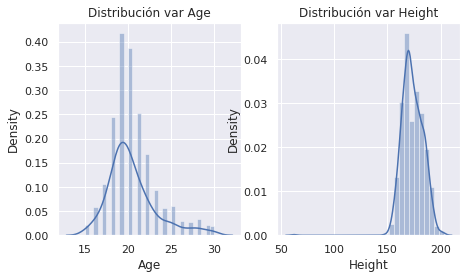

In [15]:
# Representa los histogramas de los datos completos
plt.figure(figsize=(19,18))
n = 0
for i, column in enumerate(young[['Age', 'Height']].columns):
    n+=1
    plt.subplot(4, 5, n)
    sns.distplot(young[column], bins=30)
    plt.title('Distribución var {}'.format(column))
plt.show()

In [17]:
young['Gender'].unique()

array(['female', 'male', nan], dtype=object)

In [20]:
young_female=young[young['Gender']=='female']
young_male=young[young['Gender']=='male']
# young_male['Gender'].unique()

array(['male'], dtype=object)

In [32]:
young_female.describe()[['Height','Age']]

,Height,Age
count,580.00000,589.000000
mean,167.77069,20.113752
std,7.51952,2.792537
min,62.00000,15.000000
25%,164.00000,18.000000
50%,168.00000,20.000000
75%,172.00000,21.000000
max,186.00000,30.000000


In [33]:
young_male.describe()[['Height','Age']]

,Height,Age
count,405.000000,409.000000
mean,181.758025,20.872861
std,6.964600,2.796789
min,159.000000,15.000000
25%,178.000000,19.000000
50%,182.000000,20.000000
75%,186.000000,22.000000
max,203.000000,30.000000


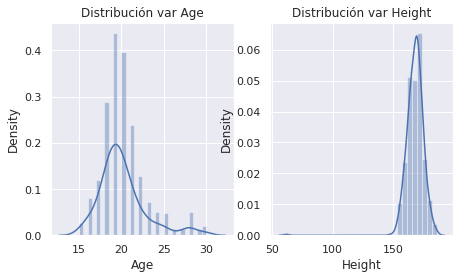

In [21]:
# Representa los histogramas de los datos completos
plt.figure(figsize=(19,18))
n = 0
for i, column in enumerate(young_female[['Age', 'Height']].columns):
    n+=1
    plt.subplot(4, 5, n)
    sns.distplot(young_female[column], bins=30)
    plt.title('Distribución var {}'.format(column))
plt.show()

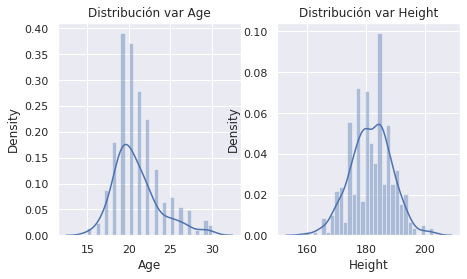

In [22]:
# Representa los histogramas de los datos completos
plt.figure(figsize=(19,18))
n = 0
for i, column in enumerate(young_male[['Age', 'Height']].columns):
    n+=1
    plt.subplot(4, 5, n)
    sns.distplot(young_male[column], bins=30)
    plt.title('Distribución var {}'.format(column))
plt.show()

### Missing values

In [27]:
young.isnull().sum()

Music                       3
Slow songs or fast songs    2
Dance                       4
Folk                        5
Country                     5
                           ..
Left - right handed         3
Education                   1
Only child                  2
Village - town              4
House - block of flats      4
Length: 150, dtype: int64

### Outliers

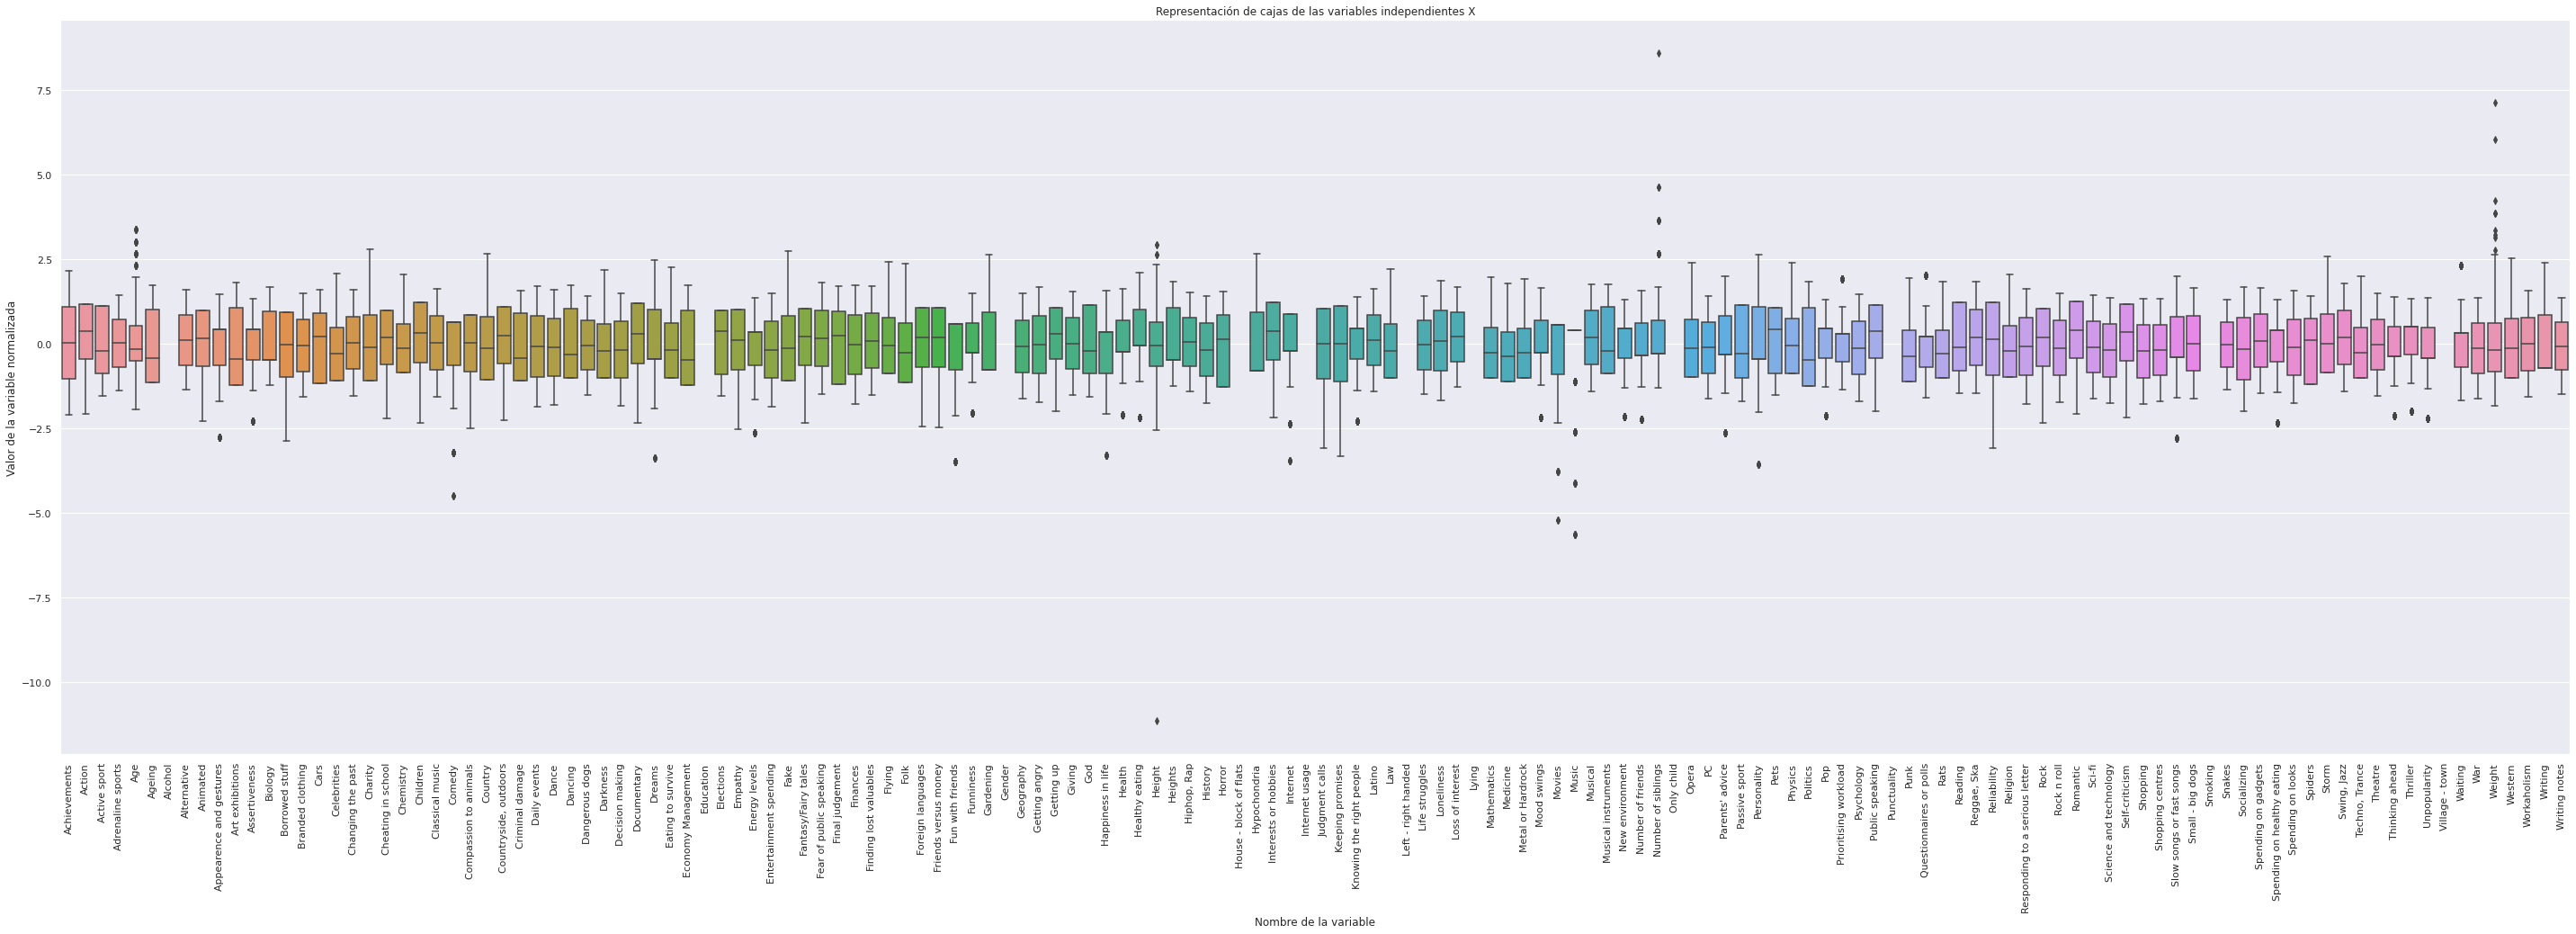

In [34]:
# Representa los boxplot
# Normaliza para tener rangos comparables en las features. No se normaliza la target
young_normalizado = (young-young.mean())/young.std()
plt.figure(figsize=(50,15))
ax = sns.boxplot(data=young_normalizado)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title(u'Representación de cajas de las variables independientes X')
plt.ylabel('Valor de la variable normalizada')
_ = plt.xlabel('Nombre de la variable')

### Gender breakdown

In [ ]:
young.groupby('Gender').count()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on healthy eating,Age,Height,Weight,Number of siblings,Left - right handed,Education,Only child,Village - town,House - block of flats
Gender,,,,,,,,,,,,,,,,,,,,,
female,590,591,591,591,592,591,592,593,589,592,...,592,589,580,580,590,591,592,592,591,590
male,411,411,409,408,407,407,410,408,409,410,...,410,409,405,405,409,410,411,410,409,410


### Correlation between variables

In [ ]:
matriz_correlaciones = young.corr(method='pearson')

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
Music,1.000000,0.100207,0.081572,0.031212,-0.007589,0.059276,0.064674,0.079583,0.165995,0.025163,...,0.098186,0.021549,0.044171,0.093457,0.018580,0.071822,-0.076829,-0.068953,-0.130746,-0.009812
Slow songs or fast songs,0.100207,1.000000,0.196041,-0.060910,-0.070274,-0.156435,-0.069897,0.064220,-0.006619,0.053267,...,0.069837,0.006592,0.109879,0.031578,0.042966,-0.028953,0.012950,0.086198,0.118354,0.005609
Dance,0.081572,0.196041,1.000000,0.065654,0.058415,-0.089148,0.074097,0.431962,-0.134825,-0.234597,...,0.191215,0.053117,0.081795,0.183470,0.079267,0.024518,0.031883,-0.002266,0.011735,0.003838
Folk,0.031212,-0.060910,0.065654,1.000000,0.386646,0.371015,0.263020,0.023270,0.059448,0.069513,...,-0.072562,-0.131004,-0.102376,-0.123502,-0.155887,-0.013510,0.133230,-0.071025,-0.013013,0.090927
Country,-0.007589,-0.070274,0.058415,0.386646,1.000000,0.256018,0.205943,0.008051,0.130418,0.112666,...,-0.066570,-0.052492,-0.065274,-0.095385,0.001734,0.007936,0.073303,0.035582,0.074182,0.032436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Spending on healthy eating,0.071822,-0.028953,0.024518,-0.013510,0.007936,0.075682,0.062426,-0.023970,0.026585,-0.008226,...,0.104950,0.173423,0.144024,0.235610,0.235251,1.000000,0.013850,0.010254,0.027052,-0.082345
Age,-0.076829,0.012950,0.031883,0.133230,0.073303,0.036074,0.015620,0.020049,0.000290,0.004631,...,-0.133868,-0.066279,-0.030833,-0.072659,-0.010787,0.013850,1.000000,0.114841,0.237722,0.090374
Height,-0.068953,0.086198,-0.002266,-0.071025,0.035582,0.001362,-0.218705,-0.100332,-0.006652,0.111295,...,-0.132933,0.147891,0.166344,-0.093688,0.227769,0.010254,0.114841,1.000000,0.697696,-0.013849
Weight,-0.130746,0.118354,0.011735,-0.013013,0.074182,0.009337,-0.153522,-0.094359,0.006746,0.168953,...,-0.151738,0.104435,0.142019,-0.087897,0.244183,0.027052,0.237722,0.697696,1.000000,-0.026896


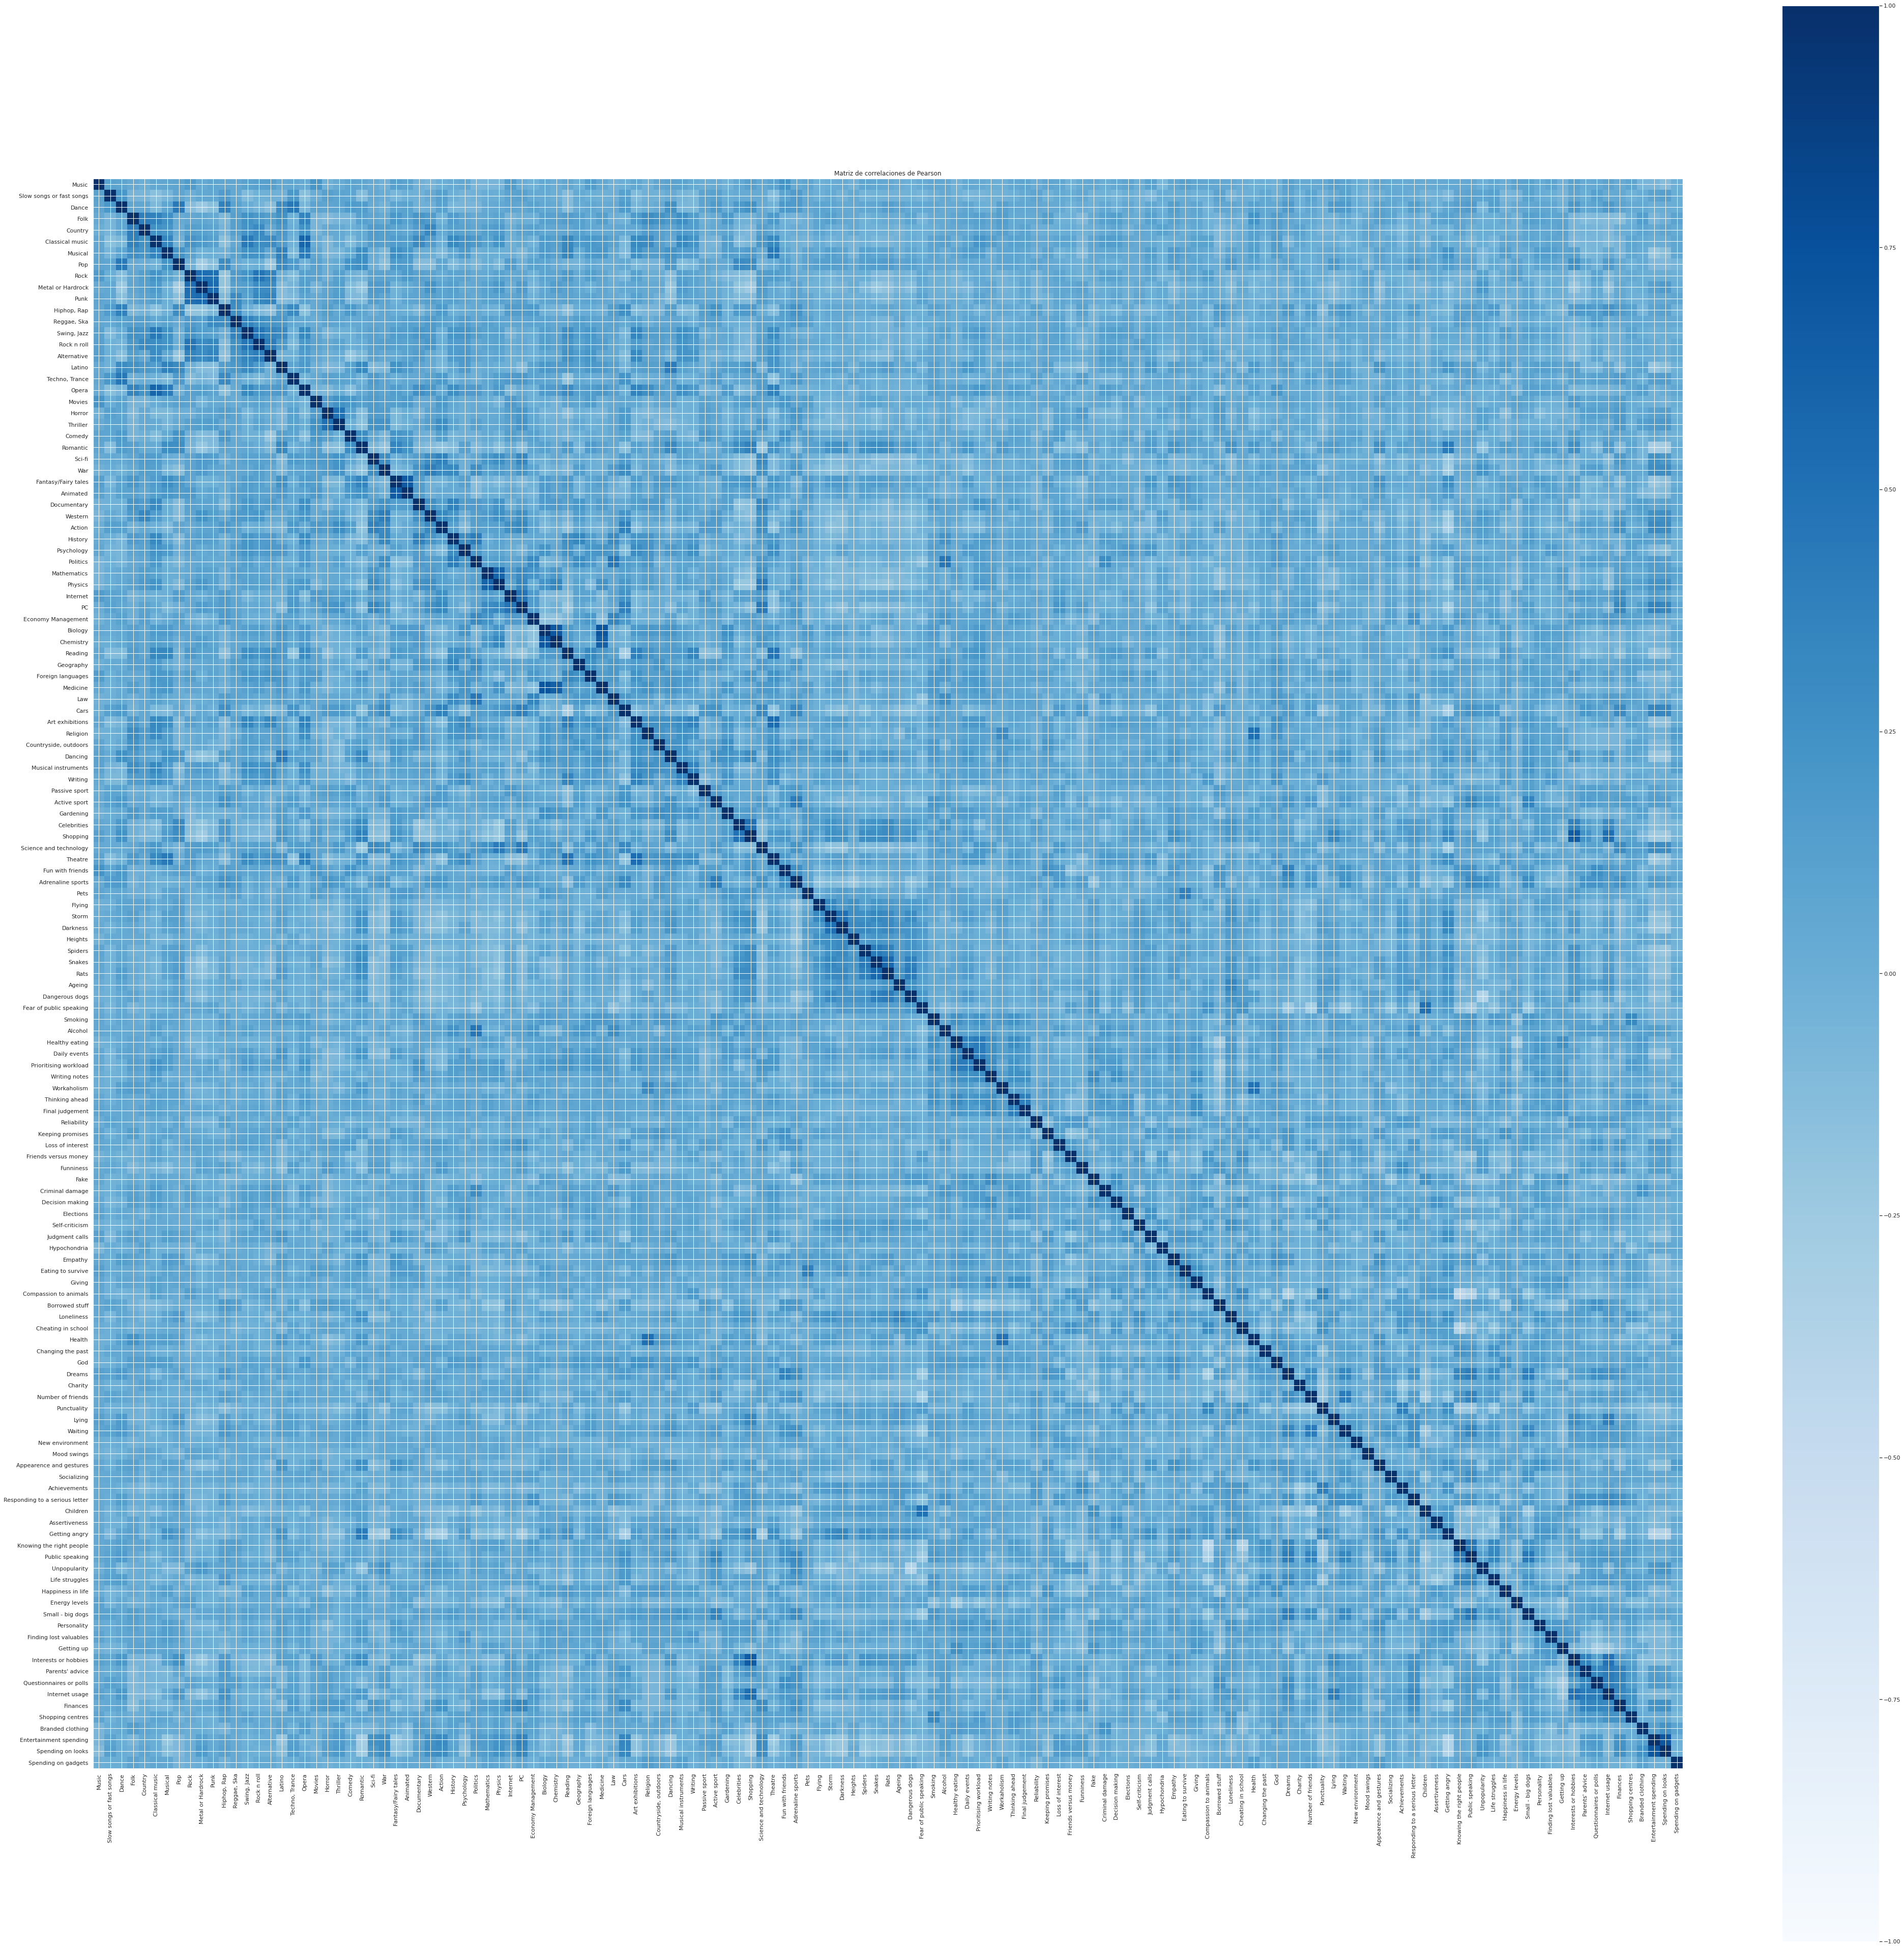

In [ ]:

matriz_correlaciones = young.corr(method='pearson')
n_ticks = len(young.columns)
plt.figure( figsize=(70, 70) )
plt.xticks(range(n_ticks), young.columns, rotation='vertical')
plt.yticks(range(n_ticks), young.columns)
plt.colorbar(plt.imshow(matriz_correlaciones, interpolation='nearest', 
                            vmin=-1., vmax=1., 
                            cmap=plt.get_cmap('Blues')))
_ = plt.title('Matriz de correlaciones de Pearson')


****
## 2. Joint probability

#### To do this we will define the concepts of marginal probability and joint probability

Marginal Probability: Probability of one variable without considering another, for example:

$$P_X=P[X=x]=\sum_{\forall y_i}p_{xy}(x,y_i)$$

#### Joint Probability: In a bivariate or multimavariate sample space, each possible outcome refers to two or more characteristics. Then the probability of a joint outcome is denoted $P(X \cap Y)$ and is defined as:

$$P_{XY}=P[(X=x)\cap(Y=y)]$$

__TODO:__
Do some research on [crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) pandas function.

****
## 3. Answers
### Smoking levels and smoking bans in bars

****
# Extras:

## Other data visualizations

#### We choose some characteristics (numerical) and analyze them breaking down by gender using a box plot